Na base de dados comorbidades.csv, são apresentados dados reais de uma amostra obtida do seade-R (Fonte dos dados originais: https://github.com/seade-R/dados-covid-sp). Essa base de dados contém as seguintes informações sobre pacientes que foram internados com diagnóstico de COVID-19 entre fevereiro de 2020 e maio de 2021:

- Identificação do paciente

- Município

- Código do IBGE

- Idade

- Sexo (1: feminino, 0: masculino)

- Óbito (1: sim, 0: não)

- Comorbidades: asma, cardiopatia, diabetes, doença hematológica, doença renal, doença hepática, doença neurológica, imunodepressão, obesidade, outros fatores de risco, pneumopatia, puérpera, síndrome de down (para cada uma delas 1: presente, 0: ausente)

As observações com dados faltantes foram excluídas da base original para esta análise específica, considerando que essa exclusão não afeta a representatividade da amostra.

     

## Questao 3

3. Descreva por meio de gráficos a associação entre idade e óbito, e repita para sexo e óbito. Considere então as comorbidades: asma, cardiopatia, diabetes, doença renal e obesidade e investigue a associação de cada uma delas com a variável óbito. Note que algumas variáveis estão codificadas em 0 e 1 mas são qualitativas. Fique atento à forma de analisar a associação entre duas variáveis qualitativas. Comente os resultados obtidos, observando que não é possível concluir estatisticamente se existe ou não associação entre as variáveis apenas com análise exploratória.

In [37]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

df = pd.read_csv('comorbidades.csv', index_col=0, decimal=',')

df.head(3)

,nome_munic,codigo_ibge,idade,sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
66,Ferraz de Vasconcelos,3515707,86,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
97,São Paulo,3550308,62,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
100,São José dos Campos,3549904,58,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


### relação idade e obitos

Text(0.5, 1.0, 'relação idade obitos')

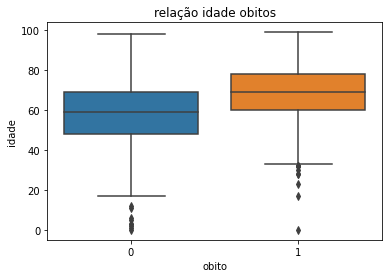

In [4]:
sns.boxplot(x=df['obito'],y=df['idade'])
plt.title('relação idade obitos')

**Análise:**
Pelo gráfico temos que obito=1 se distribui para idades um pouco mais altas se comparado a obito=0


### Relação sexo e óbito

In [13]:
tab=pd.crosstab(index=df['obito'],columns=df['sexo'])
tab/tab.sum()

sexo,0,1
obito,,
0,0.632911,0.641818
1,0.367089,0.358182


Text(0, 0.5, 'qtd')

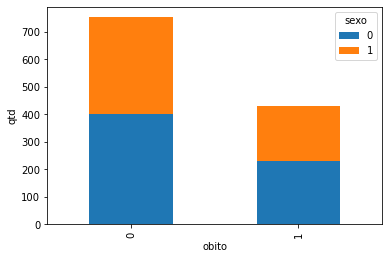

In [25]:
tab.plot.bar(stacked=True)
plt.ylabel('qtd')

**Análise:**
Pelo gráfico e tabela temos que a proporção entre o sexo 1 e 2 tanto para obito=1 e obito =0 são bem próximos, assim não é possível concluir somente por esta análise se existe ou não associação entre essas variaveis.

### Relação  asma, cardiopatia, diabetes, doença renal e obesidade com obito

In [109]:
tab=pd.crosstab(index=df['obito'],columns=df['asma'])
tab/tab.sum()

asma,0,1
obito,,
0,0.633889,0.72093
1,0.366111,0.27907


In [110]:
tab=pd.crosstab(index=df['obito'],columns=df['cardiopatia'])
tab/tab.sum()

cardiopatia,0,1
obito,,
0,0.666667,0.611374
1,0.333333,0.388626


In [111]:
tab=pd.crosstab(index=df['obito'],columns=df['diabetes'])
tab/tab.sum()

diabetes,0,1
obito,,
0,0.667114,0.585812
1,0.332886,0.414188


In [112]:
tab=pd.crosstab(index=df['obito'],columns=df['doenca_renal'])
tab/tab.sum()

doenca_renal,0,1
obito,,
0,0.644464,0.521127
1,0.355536,0.478873


In [113]:
tab=pd.crosstab(index=df['obito'],columns=df['obesidade'])
tab/tab.sum()

obesidade,0,1
obito,,
0,0.643281,0.6
1,0.356719,0.4


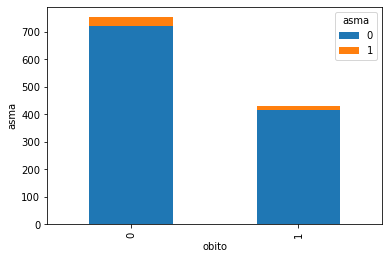

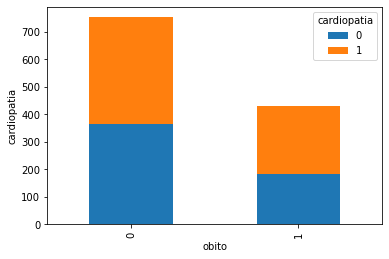

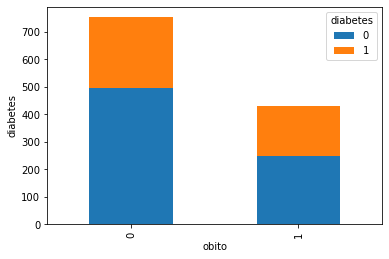

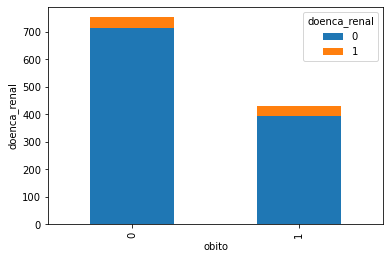

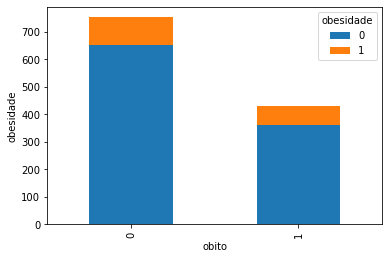

In [34]:
doe=['asma','cardiopatia','diabetes','doenca_renal','obesidade']
for i in doe:
    tab=pd.crosstab(index=df['obito'],columns=df[i])
    tab.plot.bar(stacked=True)
    plt.ylabel(i)

**Análise:** Pelos gráfico temos que ocorre a asma, cardiopatia, diabetes, doença renal e obesidade ou não para obito=1 e obito =0 são bem próximos, assim não é possível concluir somente por esta análise se existe ou não associação entre essas variaveis.

## Questão 4

 4. Ajuste um modelo de regressão logística com intercepto, considerando como variáveis preditoras o sexo, a idade e as comorbidades asma, cardiopatia, diabetes, doenca_renal, obesidade. Descreva o impacto da presença das duas comorbidades com maior significância marginal utilizando a razão de chances. Os resultados confirmam a investigação inicial da Questão 3? Comente sobre os resultados obtidos. Para este item, considere que não é necessário fazer a seleção de atributos ou dividir a base em treinamento e teste. 

In [40]:
n=len(df)
df['inter']  = np.ones(n).reshape(n,1)

In [42]:
preditoras = df[['inter','asma','cardiopatia','diabetes','doenca_renal', 'obesidade']]
resposta = df[['obito']]

In [43]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                 1182
Model:                            GLM   Df Residuals:                     1176
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -765.64
Date:                Tue, 08 Jun 2021   Deviance:                       1531.3
Time:                        22:40:06   Pearson chi2:                 1.18e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
inter           -0.8522      0.107     -7.945   

In [69]:
ax=res.summary().tables[1].as_html()
resultados=pd.read_html(ax, header=0, index_col=0)[0]

In [73]:
resultados.reset_index(inplace=True)

In [74]:
resultados

,index,coef,std err,z,P>|z|,[0.025,0.975]
0,inter,-0.8522,0.107,-7.945,0.000,-1.062,-0.642
1,asma,-0.3686,0.349,-1.055,0.292,-1.054,0.316
2,cardiopatia,0.2089,0.123,1.698,0.089,-0.032,0.450
3,diabetes,0.3301,0.125,2.636,0.008,0.085,0.576
4,doenca_renal,0.4685,0.248,1.888,0.059,-0.018,0.955
5,obesidade,0.2292,0.172,1.334,0.182,-0.108,0.566


In [106]:
print('Pacientes com asma apresentam uma diminuição de {}% na chance de óbito'.format(round(100*np.abs(np.exp(-0.3686)-1),2)))
print('-----------')
print('Pacientes com cardiopatia apresentam um aumento de {}% na chance de óbito'.format(round(100*np.abs(np.exp(0.2089)-1),2)))
print('-----------')
print('Pacientes com diabetes apresentam um aumento de {}% na chance de óbito'.format(round(100*np.abs(np.exp(0.3301)-1),2)))
print('-----------')
print('Pacientes com doenca_renal apresentam um aumento de {}% na chance de óbito'.format(round(100*np.abs(np.exp(0.4685)-1),2)))
print('-----------')
print('Pacientes com obesidade apresentam um aumento de {}% na chance de óbito'.format(round(100*np.abs(np.exp(0.2292)-1),2)))
print('-----------')

Pacientes com asma apresentam uma diminuição de 30.83% na chance de óbito
-----------
Pacientes com cardiopatia apresentam um aumento de 23.23% na chance de óbito
-----------
Pacientes com diabetes apresentam um aumento de 39.11% na chance de óbito
-----------
Pacientes com doenca_renal apresentam um aumento de 59.76% na chance de óbito
-----------
Pacientes com obesidade apresentam um aumento de 25.76% na chance de óbito
-----------


**Análise:** Doença renal e Diabetes são as doenças com maior maior significância marginal com o obito. Este fato pode ser observado nas tabelas abaixo pois diabetes e doenca_renal são as comorbidades que apresentam os maiores aumento nas taxas quando ocorre um obito se comparado as outras doencas.


In [118]:
tab=pd.crosstab(index=df['diabetes'],columns=df['obito'])
tab/tab.sum()

obito,0,1
diabetes,,
0,0.660027,0.578089
1,0.339973,0.421911


In [119]:
tab=pd.crosstab(index=df['doenca_renal'],columns=df['obito'])
tab/tab.sum()

obito,0,1
doenca_renal,,
0,0.950863,0.920746
1,0.049137,0.079254


In [120]:
tab=pd.crosstab(index=df['asma'],columns=df['obito'])
tab/tab.sum()

obito,0,1
asma,,
0,0.958831,0.972028
1,0.041169,0.027972


In [121]:
tab=pd.crosstab(index=df['cardiopatia'],columns=df['obito'])
tab/tab.sum()

obito,0,1
cardiopatia,,
0,0.486056,0.426573
1,0.513944,0.573427


In [123]:
tab=pd.crosstab(index=df['obesidade'],columns=df['obito'])
tab/tab.sum()

obito,0,1
obesidade,,
0,0.864542,0.841492
1,0.135458,0.158508
